# Correlation in codes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Setting seed for reproducibilit
np.random.seed(234)

In [2]:
#Creating a synthetic dataset

students = 40
study_hours = np.random.randint(1, 10, students) #1 to 9 hours of study
job_hours = np.random.randint(0, 15, students) #students indicates the size of the randomly generated integers between 0 and 15
sleep_hours = np.random.randint(4,9, students)
extracurricular = np.random.randint(0, 6, students)

# Exam score: positively influenced by study & sleep, negatively by job & extra activities
exam_score = (40
              + 5*study_hours #strong positive
              + 2*sleep_hours
              - 3*job_hours # strong negative
              - 1*extracurricular #mild negative
              + np.random.randint(-5, 5, students)) #noise

data = pd.DataFrame({
    'Study_Hours': study_hours,
    'Job_Hours': job_hours,
    "Sleep_Hours": sleep_hours,
    'Extracurricular_Hours': extracurricular,
    'Exam_Score': exam_score
})

In [3]:
data.head()

,Study_Hours,Job_Hours,Sleep_Hours,Extracurricular_Hours,Exam_Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [4]:
#Computing correlation for each data feature

corr_coefficients = data.corr()
corr_coefficients

,Study_Hours,Job_Hours,Sleep_Hours,Extracurricular_Hours,Exam_Score
Study_Hours,1.000000,-0.136551,-0.006383,-0.114442,0.694048
Job_Hours,-0.136551,1.000000,0.188992,0.209991,-0.782525
Sleep_Hours,-0.006383,0.188992,1.000000,0.158029,-0.035653
Extracurricular_Hours,-0.114442,0.209991,0.158029,1.000000,-0.276837
Exam_Score,0.694048,-0.782525,-0.035653,-0.276837,1.000000


In [5]:
data.columns

Index(['Study_Hours', 'Job_Hours', 'Sleep_Hours', 'Extracurricular_Hours',
       'Exam_Score'],
      dtype='object')

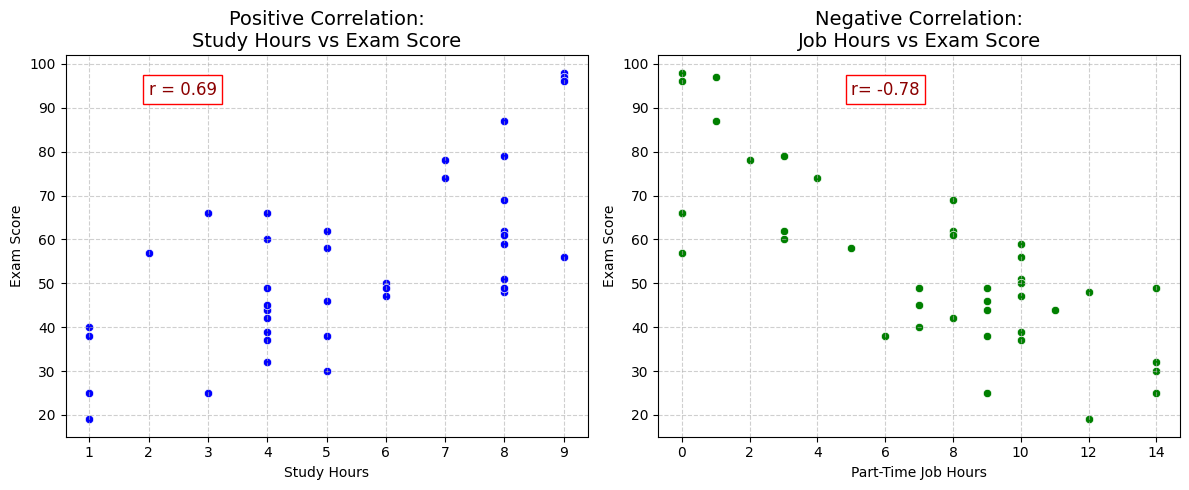

In [6]:
#Plotting the relationship on a scatter plot

#Plot: Positive and Negative examples
plt.figure(figsize=(12,5))

#Positive correlation: Study vs Score
plt.subplot(1,2,1)
sns.scatterplot(x='Study_Hours', y= 'Exam_Score', data=data, color='blue')
plt.title("Positive Correlation:\nStudy Hours vs Exam Score", fontsize=14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data['Exam_Score'])-5, f"r = {data.corr().loc['Study_Hours', 'Exam_Score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6) #Alpha adjust the opacity of the gridlines
plt.tight_layout()

#Negative correlation: Job vs Score
plt.subplot(1,2,2)
sns.scatterplot(x='Job_Hours', y='Exam_Score', data=data, color='green')
plt.title("Negative Correlation:\nJob Hours vs Exam Score", fontsize=14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")

#AddS the specified text to position x,y in data coordinates, in this case; 5, max(data['Exam_Score'])-5
plt.text(5, max(data['Exam_Score'])-5, f"r= {data.corr().loc['Job_Hours', 'Exam_Score']:.2f}",
                fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()

**Interpretation**<br><br>
**Study hours vs Exam score**<br>
There exists a strong positive correlation between the amount of study hours and exam score. That is exam score experiences an increase with increase in study hours, this does not necessarily mean that an increase in study hours automatically increases exam scores.
<br><br>

**Job hours vs exam score**<br>
There exists a strong negative correlation between the amount of job hours and exam score. That is as job hours increases there is a corresponding and significant decrease in exam score.


## **Regression**

Correlation shows whether variables move together while regression explains how much and how significantly they move together<br>
Regression analysis is used to predict the value of the dependent variable based on the values of the independent variables

### Simple Linear Regression

In [7]:
data.head()

,Study_Hours,Job_Hours,Sleep_Hours,Extracurricular_Hours,Exam_Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [8]:
#Defining variables for simpler regression
X = data['Study_Hours']
Y = data['Exam_Score']

In [9]:
X = sm.add_constant(X)

In [10]:
X.head()

,const,Study_Hours
0,1.0,9
1,1.0,5
2,1.0,2
3,1.0,4
4,1.0,8


In [11]:
#Fitting model using OLS (ordinary least squares)
model = sm.OLS(Y, X, random_state=234).fit()

c:\Users\ncc333\Desktop\DataAndDataAnalysis\Numpy\intro_to_numpy\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


In [12]:
#Displaying summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     35.32
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           6.82e-07
Time:                        10:14:43   Log-Likelihood:                -161.99
No. Observations:                  40   AIC:                             328.0
Df Residuals:                      38   BIC:                             331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6404      5.476      4.500      

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8300\2274051855.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(data['Exam_Score'])-5, f'Y= {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)


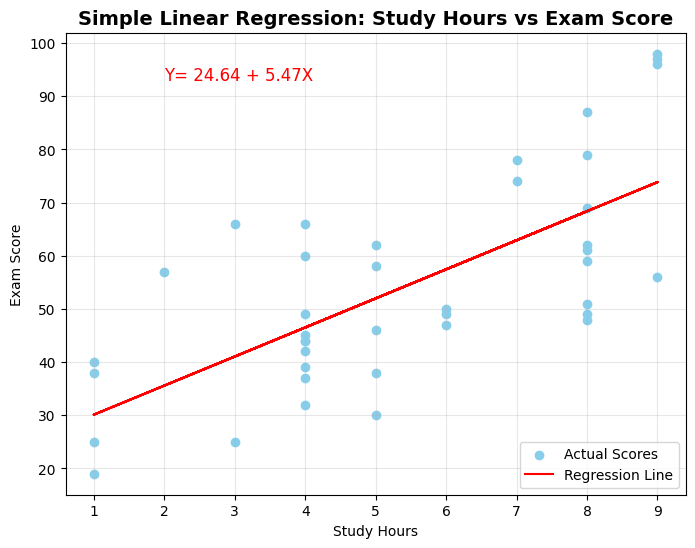

In [13]:
#The regression plot using regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['Study_Hours'], data['Exam_Score'], color='skyblue', label='Actual Scores')
plt.plot(data['Study_Hours'], model.predict(X), color='red', label='Regression Line')

#Annotate
plt.title('Simple Linear Regression: Study Hours vs Exam Score', fontsize=14, weight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam_Score'])-5, f'Y= {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

This is our equation;
`Exam Score = 24.6404 + 5.4672 * Study_Hours`

`24.6404` -  This is the intercept (constant term).
It means that when a student studies 0 hours, their expected exam score is about 24.64 points.

`5.4672` -  This is the slope coefficient for Study Hours.
It means for every additional 1 hour of study, the student’s exam score is expected to increase by about 5.47 points, on average.


In [14]:
predictions = model.predict(X)
predictions

0     73.845272
1     51.976436
2     35.574810
3     46.509227
4     68.378063
5     62.910854
6     46.509227
7     30.107601
8     46.509227
9     46.509227
10    41.042019
11    62.910854
12    73.845272
13    46.509227
14    68.378063
15    57.443645
16    68.378063
17    51.976436
18    30.107601
19    30.107601
20    68.378063
21    57.443645
22    68.378063
23    46.509227
24    46.509227
25    46.509227
26    46.509227
27    51.976436
28    51.976436
29    73.845272
30    57.443645
31    68.378063
32    41.042019
33    68.378063
34    51.976436
35    46.509227
36    73.845272
37    68.378063
38    68.378063
39    30.107601
dtype: float64

In [15]:
data['Predicted_Exam_Score'] = predictions
data['Squared_Error'] = (data['Exam_Score'] - data['Predicted_Exam_Score'])**2

data[['Study_Hours', 'Exam_Score', 'Predicted_Exam_Score', 'Squared_Error']].head()

,Study_Hours,Exam_Score,Predicted_Exam_Score,Squared_Error
0,9,56,73.845272,318.453719
1,5,46,51.976436,35.717790
2,2,57,35.574810,459.038779
3,4,37,46.509227,90.425406
4,8,69,68.378063,0.386806


### Multiple Linear Regression (Several predictors)

In [16]:
data.columns

Index(['Study_Hours', 'Job_Hours', 'Sleep_Hours', 'Extracurricular_Hours',
       'Exam_Score', 'Predicted_Exam_Score', 'Squared_Error'],
      dtype='object')

In [17]:
# Defining predictors (independent variables)
X = data[['Study_Hours', 'Job_Hours', 'Sleep_Hours', 'Extracurricular_Hours']]

In [18]:
X.head()

,Study_Hours,Job_Hours,Sleep_Hours,Extracurricular_Hours
0,9,10,4,2
1,5,9,5,1
2,2,0,6,3
3,4,10,6,5
4,8,8,7,1


In [20]:
X = sm.add_constant(X)
#The constant represents the predicted value of Y when X = 0
X.head()

,const,Study_Hours,Job_Hours,Sleep_Hours,Extracurricular_Hours
0,1.0,9,10,4,2
1,1.0,5,9,5,1
2,1.0,2,0,6,3
3,1.0,4,10,6,5
4,1.0,8,8,7,1


In [21]:
y = data['Exam_Score']
y.head()

0    56
1    46
2    57
3    37
4    69
Name: Exam_Score, dtype: int32

In [22]:
model = sm.OLS(y,X).fit() #.fit() tells python to learn all possible relationships between y and x

In [23]:
model.params

const                    44.790203
Study_Hours               4.641188
Job_Hours                -3.145561
Sleep_Hours               1.573738
Extracurricular_Hours    -0.876619
dtype: float64

In [ ]:
print(f"Y= {model.params[0]:.2f} + {model.params[1]:.2f}X")